#Ensemble & Stacking Model Review with Used Case IBM HR Analytic Data
We will look at each ensemble model and the result with standard tuning. After that we will going to analyze IBM HR Attrition data with ensemble model

## Bootstrap Aggregating or Bagging
Bootstrap Sampling with replacement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


The data used in first section is seaborn dataset titanic

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.dropna(subset=['pclass', 'sex', 'age'], inplace=True)

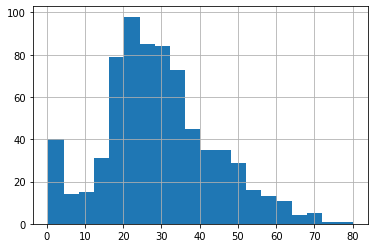

In [6]:
df['age'].hist(bins=20)
plt.show()

### Pre-processing

In [7]:
X = df[['pclass', 'sex', 'age']].copy()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
X['sex'] = le.fit_transform(df['sex'])

In [10]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [11]:
#X.dropna(inplace=True)
X.shape

(714, 3)

In [12]:
y = df['survived'].copy()

Lets fit the model

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [15]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [16]:
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
  lb = LabelBinarizer()
  lb.fit(y_train)
  if train:
    yhat = clf.predict(X_train)
    print('Training Result:\n')
    print('Accuracy Score \t\t: {0:.4f}\n'.format(accuracy_score(y_train,yhat)))
    print('Classification Report \t: \n{}\n'.format(classification_report(y_train,yhat)))
    print('Confusion Matrix \t: \n{}\n'.format(confusion_matrix(y_train,yhat)))
    print('ROC AUC Score \t\t: {0:.4f}'.format(roc_auc_score(lb.transform(y_train),lb.transform(yhat))))
  elif train == False:
    yhat = clf.predict(X_test)
    print('Testing Result:\n')
    print('Accuracy Score \t\t: {0:.4f}\n'.format(accuracy_score(y_test,yhat)))
    print('Classification Report \t: \n{}\n'.format(classification_report(y_test,yhat)))
    print('Confusion Matrix \t: \n{}\n'.format(confusion_matrix(y_test,yhat)))
    print('ROC AUC Score \t\t: {0:.4f}'.format(roc_auc_score(lb.transform(y_test),lb.transform(yhat))))

In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9078

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       299
           1       0.95      0.81      0.88       200

    accuracy                           0.91       499
   macro avg       0.92      0.89      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix 	: 
[[290   9]
 [ 37 163]]

ROC AUC Score 		: 0.8924
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8279

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       125
           1       0.88      0.68      0.77        90

    accuracy                           0.83       215
   macro avg       0.84      0.81      0.82       215
weighted avg       0.84      0.83      0.82       215


Confusion Matrix 	: 
[[117   8]
 [ 29  61]]

ROC AUC Score 		: 0.8069


Bagging Classifier

In [19]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators = 1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42, oob_score = False)

In [20]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [21]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9078

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       299
           1       0.92      0.84      0.88       200

    accuracy                           0.91       499
   macro avg       0.91      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix 	: 
[[284  15]
 [ 31 169]]

ROC AUC Score 		: 0.8974
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8279

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       125
           1       0.87      0.69      0.77        90

    accuracy                           0.83       215
   macro avg       0.84      0.81      0.82       215
weighted avg       0.83      0.83      0.82       215


Confusion Matrix 	: 
[[116   9]
 [ 28  62]]

ROC AUC Score 		: 0.8084


In [22]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators = 1000,
                            bootstrap=True, oob_score = True,
                            n_jobs=-1, random_state=42)

In [23]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, oob_score=True, random_state=42)

In [24]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9078

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       299
           1       0.92      0.84      0.88       200

    accuracy                           0.91       499
   macro avg       0.91      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix 	: 
[[284  15]
 [ 31 169]]

ROC AUC Score 		: 0.8974
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8279

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       125
           1       0.87      0.69      0.77        90

    accuracy                           0.83       215
   macro avg       0.84      0.81      0.82       215
weighted avg       0.83      0.83      0.82       215


Confusion Matrix 	: 
[[116   9]
 [ 28  62]]

ROC AUC Score 		: 0.8084


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf_clf = RandomForestClassifier(n_estimators=1000)

In [27]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [28]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9078

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       299
           1       0.91      0.85      0.88       200

    accuracy                           0.91       499
   macro avg       0.91      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix 	: 
[[283  16]
 [ 30 170]]

ROC AUC Score 		: 0.8982
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8372

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       125
           1       0.88      0.71      0.79        90

    accuracy                           0.84       215
   macro avg       0.85      0.82      0.83       215
weighted avg       0.84      0.84      0.83       215


Confusion Matrix 	: 
[[116   9]
 [ 26  64]]

ROC AUC Score 		: 0.8196


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [30]:
rf_clf = RandomForestClassifier(n_estimators=100)

In [31]:
params_grid = {'max_depth' : [5, 3, None],
               'min_samples_split': [2, 3, 10],
               'min_samples_leaf' : [1, 3, 10],
               'bootstrap' : [True, False],
               'criterion' : ['gini', 'entropy']}

In [32]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1,
                           cv=5, verbose=1, scoring='accuracy')

In [33]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 3, None],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [34]:
grid_search.best_score_

0.8235959595959595

In [35]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.8537

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       299
           1       0.88      0.74      0.80       200

    accuracy                           0.85       499
   macro avg       0.86      0.83      0.84       499
weighted avg       0.86      0.85      0.85       499


Confusion Matrix 	: 
[[278  21]
 [ 52 148]]

ROC AUC Score 		: 0.8349
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8233

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       125
           1       0.86      0.69      0.77        90

    accuracy                           0.82       215
   macro avg       0.83      0.80      0.81       215
weighted avg       0.83      0.82      0.82       215


Confusion Matrix 	: 
[[115  10]
 [ 28  62]]

ROC AUC Score 		: 0.8044


## Extra-Trees

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
xt_clf = ExtraTreesClassifier(n_estimators=100)

In [39]:
xt_clf.fit(X_train,y_train)

ExtraTreesClassifier()

In [40]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(xt_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9078

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       299
           1       0.95      0.81      0.88       200

    accuracy                           0.91       499
   macro avg       0.92      0.89      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix 	: 
[[290   9]
 [ 37 163]]

ROC AUC Score 		: 0.8924
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8186

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       125
           1       0.86      0.68      0.76        90

    accuracy                           0.82       215
   macro avg       0.83      0.80      0.81       215
weighted avg       0.82      0.82      0.81       215


Confusion Matrix 	: 
[[115  10]
 [ 29  61]]

ROC AUC Score 		: 0.7989


## Ada Boost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
ada_clf = AdaBoostClassifier(n_estimators=100)

In [43]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [44]:
ada_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [45]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.8216

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       299
           1       0.78      0.77      0.78       200

    accuracy                           0.82       499
   macro avg       0.81      0.81      0.81       499
weighted avg       0.82      0.82      0.82       499


Confusion Matrix 	: 
[[256  43]
 [ 46 154]]

ROC AUC Score 		: 0.8131
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8000

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       125
           1       0.78      0.73      0.75        90

    accuracy                           0.80       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215


Confusion Matrix 	: 
[[106  19]
 [ 24  66]]

ROC AUC Score 		: 0.7907


In [46]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators = 100), n_estimators = 100)

In [47]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [48]:
ada_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': RandomForestClassifier(),
 'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [49]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9078

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       299
           1       0.90      0.86      0.88       200

    accuracy                           0.91       499
   macro avg       0.91      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix 	: 
[[280  19]
 [ 27 173]]

ROC AUC Score 		: 0.9007
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8326

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       125
           1       0.85      0.73      0.79        90

    accuracy                           0.83       215
   macro avg       0.84      0.82      0.82       215
weighted avg       0.83      0.83      0.83       215


Confusion Matrix 	: 
[[113  12]
 [ 24  66]]

ROC AUC Score 		: 0.8187


## Gradient Boosting Machine

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gbc_clf = GradientBoostingClassifier()

In [52]:
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [53]:
gbc_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [54]:
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.8657

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       299
           1       0.88      0.77      0.82       200

    accuracy                           0.87       499
   macro avg       0.87      0.85      0.86       499
weighted avg       0.87      0.87      0.86       499


Confusion Matrix 	: 
[[278  21]
 [ 46 154]]

ROC AUC Score 		: 0.8499
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8372

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       125
           1       0.86      0.73      0.79        90

    accuracy                           0.84       215
   macro avg       0.84      0.82      0.83       215
weighted avg       0.84      0.84      0.83       215


Confusion Matrix 	: 
[[114  11]
 [ 24  66]]

ROC AUC Score 		: 0.8227


### Extreme Gradient Boosting (XGBoost)

In [56]:
import xgboost as xgb

In [60]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate= 0.3, n_jobs= -1)

In [61]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=10000, n_jobs=-1)

In [62]:
xgb_clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 10000,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [63]:
print_score(xgb_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(xgb_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9038

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       299
           1       0.91      0.84      0.87       200

    accuracy                           0.90       499
   macro avg       0.91      0.89      0.90       499
weighted avg       0.90      0.90      0.90       499


Confusion Matrix 	: 
[[283  16]
 [ 32 168]]

ROC AUC Score 		: 0.8932
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8093

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       125
           1       0.83      0.69      0.75        90

    accuracy                           0.81       215
   macro avg       0.81      0.79      0.80       215
weighted avg       0.81      0.81      0.81       215


Confusion Matrix 	: 
[[112  13]
 [ 28  62]]

ROC AUC Score 		: 0.7924


# Project IBM HR Analytics Employee Attrition & Performance with Ensemble

In [64]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [65]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [67]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [69]:
num_cols = list(df.describe().columns)
cat_cols = list(set(df.columns).difference(num_cols))
removed = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
num_cols = [col for col in num_cols if col not in removed]

In [70]:
print("Total Column \t\t: \t{}".format(len(df.columns)))
print("Categorical Column \t: \t{}".format(len(cat_cols)))
print("Numerical Column \t: \t{}".format(len(num_cols)))

Total Column 		: 	35
Categorical Column 	: 	9
Numerical Column 	: 	23


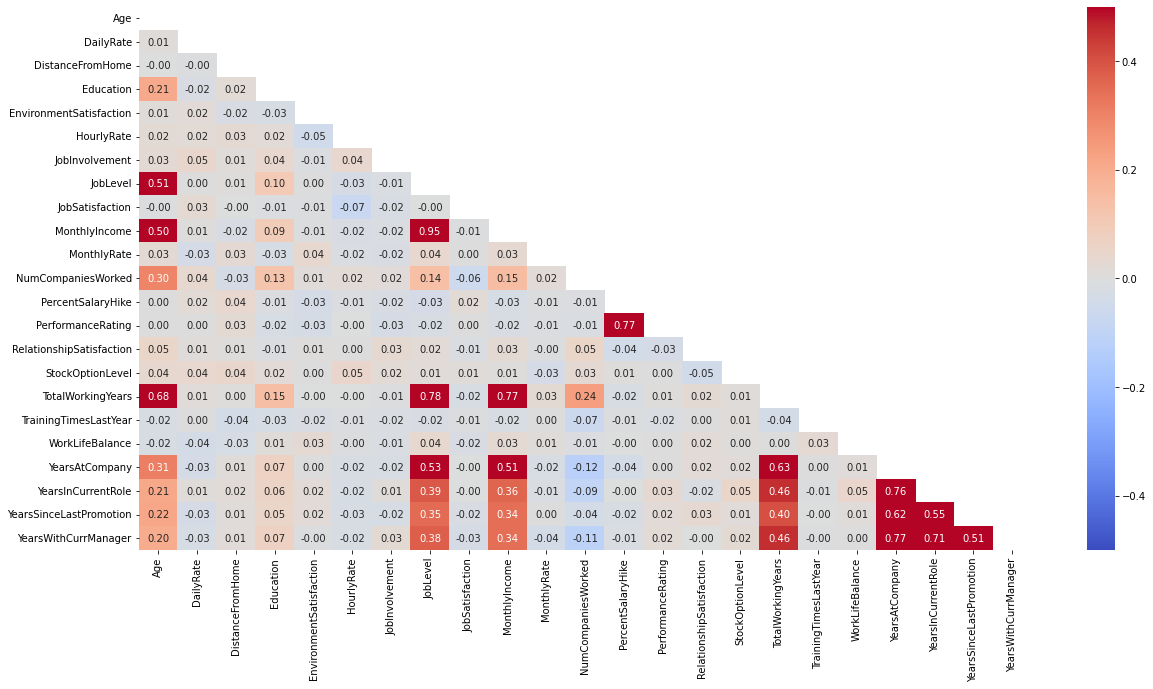

In [71]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(df[num_cols].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[num_cols].corr(), mask=mask, annot=True, fmt='.2f', center = 0, vmax=0.5, vmin=-0.5,
            cmap = sns.color_palette("coolwarm", as_cmap=True))
plt.show()

In [72]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [73]:
attrition_to_binary = {'Yes': 0, 'No': 1}
df['Attrition'] = df['Attrition'].map(attrition_to_binary)

In [74]:
cat_cols.remove('Attrition')

In [75]:
df_cat = pd.get_dummies(df[cat_cols])

In [76]:
X = pd.concat([df[num_cols], df_cat], axis=1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y,OverTime_No,OverTime_Yes,Gender_Female,Gender_Male,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [77]:
y = df['Attrition']

## Decision Tree

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 1.0000

Classification Report 	: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix 	: 
[[184   0]
 [  0 992]]

ROC AUC Score 		: 1.0000
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.7653

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.36      0.38      0.37        53
           1       0.86      0.85      0.86       241

    accuracy                           0.77       294
   macro avg       0.61      0.61      0.61       294
weighted avg       0.77      0.77      0.77       294


Confusion Matrix 	: 
[[ 20  33]
 [ 36 205]]

ROC AUC Score 		: 0.6140


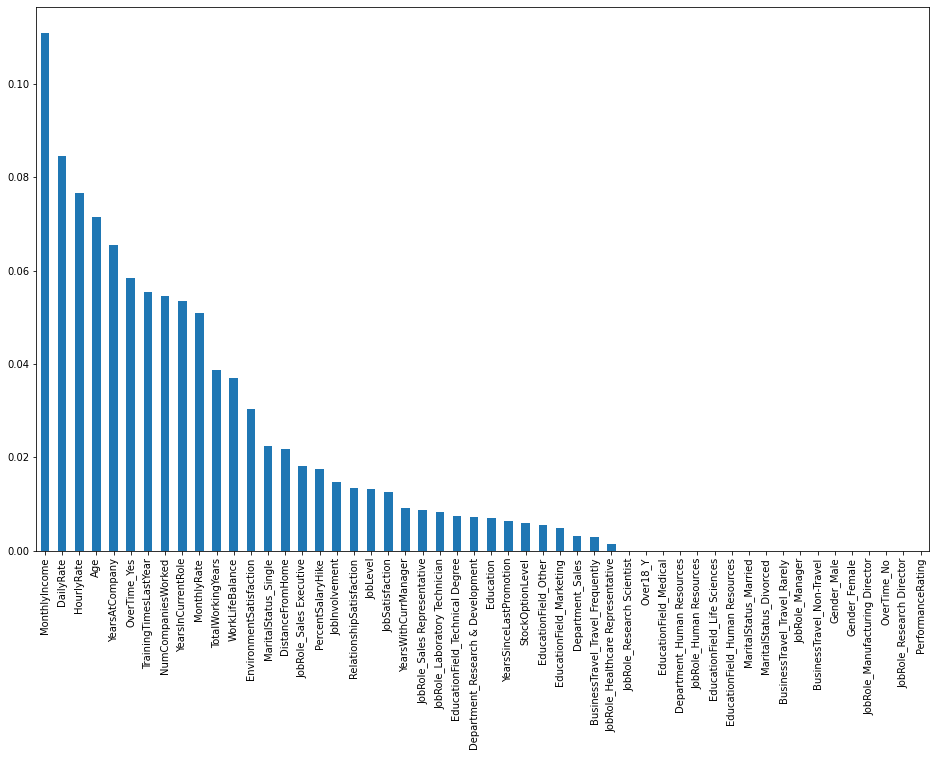

In [89]:
pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(16,10))
plt.show()

## Bagging

In [80]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators= 1000,
                            bootstrap=True, n_jobs=-1, random_state=42)

In [81]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [82]:
bag_clf.get_params()

{'base_estimator': DecisionTreeClassifier(),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [83]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 1.0000

Classification Report 	: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix 	: 
[[184   0]
 [  0 992]]

ROC AUC Score 		: 1.0000
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8639

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.84      0.30      0.44        53
           1       0.87      0.99      0.92       241

    accuracy                           0.86       294
   macro avg       0.85      0.64      0.68       294
weighted avg       0.86      0.86      0.84       294


Confusion Matrix 	: 
[[ 16  37]
 [  3 238]]

ROC AUC Score 		: 0.6447


## Random Forest

In [84]:
rf_clf = RandomForestClassifier(n_estimators= 1000)

In [85]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [86]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 1.0000

Classification Report 	: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix 	: 
[[184   0]
 [  0 992]]

ROC AUC Score 		: 1.0000
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8639

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.84      0.30      0.44        53
           1       0.87      0.99      0.92       241

    accuracy                           0.86       294
   macro avg       0.85      0.64      0.68       294
weighted avg       0.86      0.86      0.84       294


Confusion Matrix 	: 
[[ 16  37]
 [  3 238]]

ROC AUC Score 		: 0.6447


## Ada Boost

In [90]:
ada_clf = AdaBoostClassifier()

In [91]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [92]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9082

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.82      0.53      0.64       184
           1       0.92      0.98      0.95       992

    accuracy                           0.91      1176
   macro avg       0.87      0.75      0.79      1176
weighted avg       0.90      0.91      0.90      1176


Confusion Matrix 	: 
[[ 97  87]
 [ 21 971]]

ROC AUC Score 		: 0.7530
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8605

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.77      0.32      0.45        53
           1       0.87      0.98      0.92       241

    accuracy                           0.86       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.85      0.86      0.84       294


Confusion Matrix 	: 
[[ 17  36]
 [  5 236]]

ROC AUC Score 		: 0.6500


## Ada Boost with Random Forest

In [93]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=1000), n_estimators= 1000)

In [94]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000),
                   n_estimators=1000)

In [95]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 1.0000

Classification Report 	: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix 	: 
[[184   0]
 [  0 992]]

ROC AUC Score 		: 1.0000
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8469

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.90      0.17      0.29        53
           1       0.85      1.00      0.91       241

    accuracy                           0.85       294
   macro avg       0.87      0.58      0.60       294
weighted avg       0.85      0.85      0.80       294


Confusion Matrix 	: 
[[  9  44]
 [  1 240]]

ROC AUC Score 		: 0.5828


## Gradient Boosting Classifier

In [96]:
gbc_clf = GradientBoostingClassifier(n_estimators=1000)

In [97]:
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000)

In [99]:
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 1.0000

Classification Report 	: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix 	: 
[[184   0]
 [  0 992]]

ROC AUC Score 		: 1.0000
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8605

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.70      0.40      0.51        53
           1       0.88      0.96      0.92       241

    accuracy                           0.86       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.85      0.86      0.84       294


Confusion Matrix 	: 
[[ 21  32]
 [  9 232]]

ROC AUC Score 		: 0.6794


XGBoost

In [100]:
xgb_clf = xgb.XGBClassifier(n_estimators= 1000)

In [101]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(n_estimators=1000)

In [102]:
print_score(xgb_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(xgb_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 1.0000

Classification Report 	: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix 	: 
[[184   0]
 [  0 992]]

ROC AUC Score 		: 1.0000
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8707

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.76      0.42      0.54        53
           1       0.88      0.97      0.92       241

    accuracy                           0.87       294
   macro avg       0.82      0.69      0.73       294
weighted avg       0.86      0.87      0.85       294


Confusion Matrix 	: 
[[ 22  31]
 [  7 234]]

ROC AUC Score 		: 0.6930


## Ensemble of ensembles Stacking

### Model 1 Decision Tree

In [103]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(tree_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 1.0000

Classification Report 	: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix 	: 
[[184   0]
 [  0 992]]

ROC AUC Score 		: 1.0000
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.7415

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.30      0.32      0.31        53
           1       0.85      0.83      0.84       241

    accuracy                           0.74       294
   macro avg       0.57      0.58      0.58       294
weighted avg       0.75      0.74      0.75       294


Confusion Matrix 	: 
[[ 17  36]
 [ 40 201]]

ROC AUC Score 		: 0.5774


### Model 2 Random Forest Classifier

In [104]:
rf_clf = RandomForestClassifier(n_estimators= 100)
rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)
print("----------------------------------------------")
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 1.0000

Classification Report 	: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix 	: 
[[184   0]
 [  0 992]]

ROC AUC Score 		: 1.0000
----------------------------------------------
Testing Result:

Accuracy Score 		: 0.8537

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.92      0.21      0.34        53
           1       0.85      1.00      0.92       241

    accuracy                           0.85       294
   macro avg       0.88      0.60      0.63       294
weighted avg       0.86      0.85      0.81       294


Confusion Matrix 	: 
[[ 11  42]
 [  1 240]]

ROC AUC Score 		: 0.6017


## Stacking Both Model

In [105]:
stack_df = pd.DataFrame()

In [107]:
stack_df['tree_clf'] = pd.DataFrame(tree_clf.predict_proba(X_train))[1]
stack_df['rf_clf'] = pd.DataFrame(rf_clf.predict_proba(X_train))[1]
col_names = stack_df.columns
stack_df = pd.concat([stack_df, pd.DataFrame(y_train).reset_index(drop=True)], axis=1)

In [108]:
stack_df.head()

,tree_clf,rf_clf,Attrition
0,1.0,0.91,1
1,1.0,0.90,1
2,1.0,0.96,1
3,1.0,0.97,1
4,1.0,0.97,1


In [109]:
from sklearn.linear_model import LogisticRegression
m_clf = LogisticRegression(fit_intercept = False, solver = 'lbfgs')
m_clf.fit(stack_df[['tree_clf', 'rf_clf']],stack_df['Attrition'])

LogisticRegression(fit_intercept=False)

In [113]:
test_df = pd.DataFrame()
test_df['tree_clf'] = pd.DataFrame(tree_clf.predict_proba(X_test))[1]
test_df['rf_clf'] = pd.DataFrame(rf_clf.predict_proba(X_test))[1]
test_df['combined'] = m_clf.predict(test_df[['tree_clf', 'rf_clf']])

In [114]:
test_df = pd.concat([test_df, pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

In [115]:
test_df.head()

,tree_clf,rf_clf,combined,Attrition
0,1.0,0.75,1,1
1,1.0,0.91,1,1
2,0.0,0.45,0,0
3,1.0,0.96,1,1
4,1.0,0.93,1,1


In [116]:
print(pd.crosstab(test_df['Attrition'],test_df['combined']))

combined    0    1
Attrition         
0          17   36
1          40  201


In [117]:
print(accuracy_score(test_df['Attrition'],test_df['combined']))

0.7414965986394558


In [118]:
print(classification_report(test_df['Attrition'],test_df['combined']))

              precision    recall  f1-score   support

           0       0.30      0.32      0.31        53
           1       0.85      0.83      0.84       241

    accuracy                           0.74       294
   macro avg       0.57      0.58      0.58       294
weighted avg       0.75      0.74      0.75       294

